# Introduction
- This dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

# Importing Libraries

In [2]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import requests as rt 
import tweepy
import json 

# 1.0 Gathering Data 

### 1.1 Gather_from_csvfile 

In [3]:
#reading_data 
twitter_archive_enhanced = pd.read_csv("Data1.csv")

### 1.2 Gather_from_the Internet

In [4]:
#making file path or check for it 
folder_name = 'image_predictions_file'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = rt.get(url)

In [5]:
#opening the file 
with open(os.path.join(folder_name,
                      url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)

In [6]:
#reading file 
image_predictions = pd.read_csv('ebert_reviews\\image-predictions.tsv' , sep = "\t")

### 1.3 Gather_from_API

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


### 1.3 Gather_from_json-file

In [7]:
#opening json file 
df_list = []

with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [8]:
#reading json file data
tweet_data = pd.DataFrame(df_list , columns = ['id' , 'retweet_count' , 'favorite_count'])

# 2.0 Assessing_Data 

### 2.1 Assess_'twitter-archive-data'

In [9]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
1824,676496375194980353,NaN,NaN,2015-12-14 20:17:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Griffin. He's upset because his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676496375...,9,10,Griffin,None,None,None,None
1299,707738799544082433,NaN,NaN,2016-03-10 01:24:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",He's doing his best. 12/10 very impressive tha...,NaN,NaN,NaN,https://vine.co/v/hUvHKYrdb1d,12,10,None,None,None,None,None
1130,729113531270991872,NaN,NaN,2016-05-08 00:59:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge accepted""\n10/10 https://t.co/vNjvr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729113531...,10,10,None,None,None,None,None
1047,743510151680958465,NaN,NaN,2016-06-16 18:26:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Beya. She doesn't want to swim, so she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743510151...,13,10,Beya,None,None,None,None
1450,695816827381944320,NaN,NaN,2016-02-06 03:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a dog enjoying a sunset. 11/10 would tr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695816827...,11,10,None,None,None,None,None
714,784057939640352768,NaN,NaN,2016-10-06 15:49:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Balto. He's very content. Legendary to...,NaN,NaN,NaN,https://vine.co/v/5gKxeUpuKEr,12,10,Balto,None,None,None,None
1422,698178924120031232,NaN,NaN,2016-02-12 16:16:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lily. She accidentally dropped all her...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698178924...,10,10,Lily,None,None,None,None
528,808501579447930884,NaN,NaN,2016-12-13 02:39:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He dug a hole and then sat in it...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808501579...,12,10,Koda,None,None,None,None
995,748346686624440324,NaN,NaN,2016-06-30 02:45:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""So... we meat again"" (I'm so sorry for that p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/748346686...,10,10,None,None,None,None,None


In [11]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive_enhanced.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Daisy          7
an             7
Bailey         7
Toby           7
Jack           6
Scout          6
Bella          6
Leo            6
Rusty          6
Oscar          6
Stanley        6
Jax            6
Dave           6
Milo           6
Koda           6
Alfie          5
            ... 
Andy           1
Patch          1
Zoe            1
Ralph          1
Philippe       1
Bookstore      1
Cermet         1
Jaycob         1
Tanner         1
Gabby          1
Carter         1
Hero           1
Darby          1
Liam           1
Jessifer       1
Eevee          1
Holly          1
Jeffrie        1
Teddy          1
Clarq          1
Filup          1
Tedders        1
Mike           1
Bobb           1
Angel          1
Hector         1
Lulu           1
Gunner        

In [13]:
twitter_archive_enhanced.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [14]:
twitter_archive_enhanced.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/698195409219559425/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/866334964761202691/photo/1,https://twitter.com/dog_rates/status/866334964761202691/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1                                                                    2
https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1                                                                                          

In [15]:
type(twitter_archive_enhanced.timestamp[0])

str

In [16]:
twitter_archive_enhanced.duplicated().sum()

0

In [17]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### 2.2 Assess_image-predictions

In [19]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
894,699434518667751424,https://pbs.twimg.com/media/CbTj--1XEAIZjc_.jpg,1,golden_retriever,0.836572,True,kuvasz,0.105946,True,Labrador_retriever,0.025144,True
1582,796759840936919040,https://pbs.twimg.com/media/Cw6o1JQXcAAtP78.jpg,1,American_Staffordshire_terrier,0.463996,True,Staffordshire_bullterrier,0.155566,True,Weimaraner,0.137587,True
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
679,683742671509258241,https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg,1,Pembroke,0.895279,True,Cardigan,0.022385,True,cocker_spaniel,0.017045,True
867,697575480820686848,https://pbs.twimg.com/media/Ca5JMvMUsAAGMll.jpg,1,Siamese_cat,0.256698,False,whippet,0.119805,True,bull_mastiff,0.102595,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
703,684914660081053696,https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg,1,shopping_cart,0.460950,False,chow,0.261288,True,Labrador_retriever,0.074194,True
904,700143752053182464,https://pbs.twimg.com/media/CbdpBmLUYAY9SgQ.jpg,1,golden_retriever,0.532460,True,crossword_puzzle,0.103796,False,binder,0.100371,False
940,703774238772166656,https://pbs.twimg.com/media/CcRO8FmW4AAzazk.jpg,1,Labrador_retriever,0.990119,True,Chesapeake_Bay_retriever,0.008026,True,curly-coated_retriever,0.001242,True
1099,720415127506415616,https://pbs.twimg.com/media/Cf9tuHUWsAAHSrV.jpg,1,Rottweiler,0.990312,True,black-and-tan_coonhound,0.002495,True,American_black_bear,0.001733,False


In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
type(image_predictions.jpg_url[0])

str

In [23]:
image_predictions.duplicated().sum()

0

### 2.3 Assess_tweet-data

In [24]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [25]:
tweet_data.sample(10)

,id,retweet_count,favorite_count
1201,716285507865542656,1225,3041
17,888804989199671297,4559,26080
303,836380477523124226,3337,16037
1790,677334615166730240,328,1477
79,877316821321428993,5414,27907
2176,669015743032369152,403,785
597,798686750113755136,2702,0
68,879050749262655488,4941,23022
892,759197388317847553,2221,6725
819,770293558247038976,1718,6923


In [26]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [27]:
tweet_data.duplicated().sum()

0

## 1) Quality
 
#### A- twitter_archive_enhanced
- tweet_id should be "string" not "int" 
- some values in rating_denominator column isn't "10" 
- some values in rating_numerator column less than "10" 
- some values in rating_numerator column = zero 
- timestamp should be "data time" not "str" 
- retweeted_status_id  should be removed because we interest in tweet 
- retweeted_status_user_id should be removed because we interest in tweet 
- retweeted_status_timestamp should be removed because we interest in tweet 
- Nulls represented as (none) in name column 
- some of expanded_urls rows has 2 url and we just need tweeter link 
- 59 missing value in expanded_urls column 
- some values in rating_numerator column over ratted
- strange names like ('a' , 'an') in name column 

#### B- image-predictions
- tweet_id should be "string" not "int" 
- names p columns have some upper letter and some lower letter 
- missing id's there are '2075' instead of  '2353' 

#### C- tweet_data
- id column name should be "tweet_id" instead of "id" 
- tweet_id should be "string" not "int" 
- missing id 2075 i 2324 

### Totall Quality issues : 19 

## 2) tidiness

#### A- twitter_archive_enhanced
- doggo, floofer, pupper, and puppo should be in one column not 4 

#### B- image-predictions
- in columns "confg" should be configration

#### C- tweet_data
- no isssues 

#### For A , B and C 
- combining the three dataframes in one dataframe 

### Totall tidiness issues : 3 

## making copy from all data sets 

In [28]:
clean_twitter_archive = twitter_archive_enhanced.copy()
clean_image_predictions = image_predictions.copy()
clean_tweet_data = tweet_data.copy()

# 3.0 Cleaning_Data

## issue_1
- Quality : tweet_id should be "string" not "int" 

#### .Define
- replace the name column from "id" to "tweet_id"

#### .Code 

In [29]:
clean_tweet_data.rename(columns={'id': 'tweet_id'}, inplace=True)

#### .Test

In [30]:
clean_tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## issue_2
- tidiness : combining the three dataframes in one dataframe 

#### .Define
- merging tables with merge method 

#### .Code 

In [31]:
clean_twitter_archive = pd.merge(clean_twitter_archive , image_predictions , on= "tweet_id" , how="left") 
clean_twitter_archive = pd.merge(clean_twitter_archive , clean_tweet_data , on= "tweet_id" , how="left")

#### .Test

In [32]:
clean_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261.0,20562.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158.0,12041.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716.0,56848.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429.0,28226.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711.0,32467.0


## issue_3
- Quality :  tweet_id should be "string" not "int"

#### .Define 
- converet column type with astype method 

#### .Code 

In [33]:
clean_twitter_archive['tweet_id'] = clean_twitter_archive['tweet_id'].astype(str)

#### .Test

In [34]:
type(clean_twitter_archive['tweet_id'][0])

str

## issue_4
- tidiness : doggo, floofer, pupper, and puppo should be in one column not 4 

#### .Define
- extract dog stage from text and put it in new column 'dog stage' then drop the real columns 

#### .Code 

In [35]:
clean_twitter_archive['Dog_stage'] = clean_twitter_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_twitter_archive = clean_twitter_archive.drop(columns=['doggo','floofer','pupper','puppo'])

#### .Test

In [36]:
clean_twitter_archive['Dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: Dog_stage, dtype: int64

## issue_5
- Quality : some values in rating_denominator column isn't "10"

#### .Define
- replace the values from any num less than 10 to 10 

#### .Code 

In [37]:
clean_twitter_archive.rating_denominator = clean_twitter_archive.rating_denominator.replace( range(0,1000) , 10 )     

#### .Test

In [38]:
clean_twitter_archive.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

## issues_6,7
- Quality : some values in rating_numerator column less than "10"
- Quality : some values in rating_numerator column = zero 

#### .Define
- adding 10 to correct this values 

#### .Code 

In [42]:
clean_twitter_archive.rating_numerator[clean_twitter_archive['rating_numerator'] <= 10 ] = clean_twitter_archive.rating_numerator[clean_twitter_archive['rating_numerator'] <= 10 ].add(10)

#### .Test

In [43]:
clean_twitter_archive.rating_numerator.value_counts()

12      567
11      473
20      464
13      370
19      158
18      102
14       71
17       56
15       39
16       32
75        2
420       2
84        1
24        1
26        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [44]:
clean_twitter_archive.query('rating_numerator <= 10 ').rating_numerator.sum()

0

## issue_8
- Quality : timestamp should be "data time" not "str"

#### .Define
- convert the column type using to_datetime method

#### .Code 

In [45]:
clean_twitter_archive['timestamp']= pd.to_datetime(clean_twitter_archive['timestamp'])

#### .Test

In [46]:
type(clean_twitter_archive['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

## issue_9,10.11
- Quality :
  - retweeted_status_id  should be removed
  - retweeted_status_user_id should be removed 
  - retweeted_status_timestamp should be removed 

#### .Define
- remove this columns using drop method

#### .Code 

In [47]:
clean_twitter_archive = clean_twitter_archive.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp'])

#### .Test

In [48]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null datetime64[ns, UTC]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
jpg_url                  2075 non-null object
img_num                  2075 non-null float64
p1                       2075 non-null object
p1_conf                  2075 non-null float64
p1_dog                   2075 non-null object
p2                       2075 non-null object
p2_conf                  2075 non-null float64
p2_dog                   2075 non-null object
p3                       2075 non-null object
p3_conf

## issue_12
- Quality : Nulls represented as (none) in name column  

#### .Define
- replace this values with nulls using replace method and numpy nan method 

#### .Code 

In [49]:
clean_twitter_archive.name = twitter_archive_enhanced.name.replace("None", value = np.nan )

#### .Test

In [50]:
clean_twitter_archive.name.isnull().sum()

745

## issue_13
- Quality : names p columns have some upper letter and some lower letter  


#### .Define
- make letters capital with title method 

#### .Code 

In [51]:
clean_twitter_archive.p1 = clean_twitter_archive.p1.str.title()
clean_twitter_archive.p2 = clean_twitter_archive.p2.str.title()
clean_twitter_archive.p3 = clean_twitter_archive.p3.str.title()

#### .Test


In [52]:
clean_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774.0,41048.0,NaN


## issue_14
- in columns "confg" should be configration

#### .Define
- edit the name of the column usinf rename method 

#### .Code 


In [53]:
clean_twitter_archive.rename(columns={'p1_conf': 'p1_confident'}, inplace=True)
clean_twitter_archive.rename(columns={'p2_conf': 'p2_confident'}, inplace=True)
clean_twitter_archive.rename(columns={'p3_conf': 'p3_confident'}, inplace=True)

#### .Test


In [54]:
clean_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_confident,p2_dog,p3,p3_confident,p3_dog,retweet_count,favorite_count,Dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774.0,41048.0,NaN


# 3.0 Storing_Data

In [56]:
clean_twitter_archive.to_csv('C:\\Users\\BluRay\\Desktop\\DA-P2\\twitter_archive_master.csv', index=False)

# 4.0 Analyzing, and Visualizing_Data

In [34]:
clean_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_confident,p2_dog,p3,p3_confident,p3_dog,retweet_count,favorite_count,Dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774.0,41048.0,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,...,True,Irish_Terrier,0.116317,True,Indian_Elephant,0.076902,False,3261.0,20562.0,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,True,Border_Collie,0.199287,True,Ice_Lolly,0.193548,False,2158.0,12041.0,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,...,True,Eskimo_Dog,0.178406,True,Pembroke,0.076507,True,16716.0,56848.0,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,True,Irish_Setter,0.193054,True,Chesapeake_Bay_Retriever,0.118184,True,4429.0,28226.0,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711.0,32467.0,doggo


### 4.1 Dog_stage ratios

<BarContainer object of 4 artists>

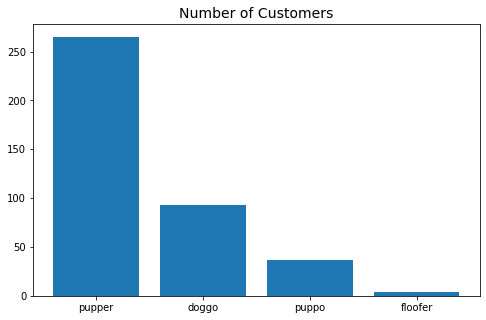

In [35]:
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_twitter_archive['Dog_stage'].value_counts().index,
        height=clean_twitter_archive.Dog_stage.value_counts().values)

## insights 
- pupper is the Most Popular stage
- floofer is the least popular stage 

### 4.2 The success rate of the algorithms

In [36]:
clean_twitter_archive['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [37]:
tolall= (1532+543)
sucsses_p1 = (1532/tolall)*100
sucsses_p1

73.83132530120481

<BarContainer object of 2 artists>

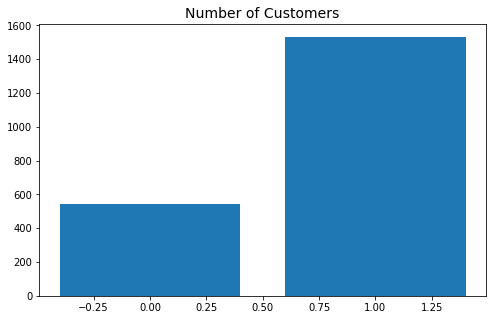

In [38]:
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_twitter_archive['p1_dog'].value_counts().index,
        height=clean_twitter_archive.p1_dog.value_counts().values)

In [39]:
clean_twitter_archive['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [40]:
tolall= (1553+522)
sucsses_p2 = (1553/tolall)*100
sucsses_p2

74.8433734939759

<BarContainer object of 2 artists>

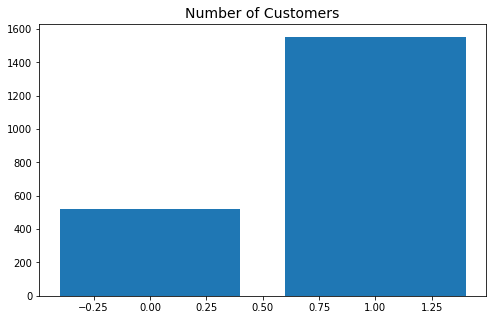

In [41]:
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_twitter_archive['p2_dog'].value_counts().index,
        height=clean_twitter_archive.p2_dog.value_counts().values)

In [42]:
clean_twitter_archive['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [43]:
tolall= (1499+576)
sucsses_p3 = (1499/tolall)*100
sucsses_p3

72.2409638554217

<BarContainer object of 2 artists>

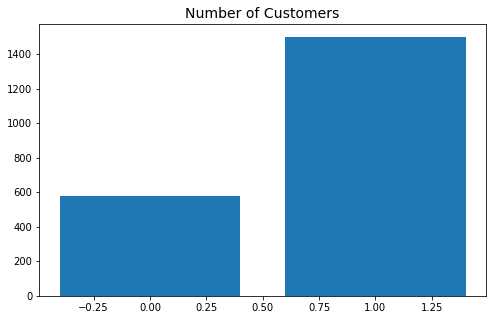

In [44]:
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_twitter_archive['p3_dog'].value_counts().index,
        height=clean_twitter_archive.p3_dog.value_counts().values)

In [1]:
plt.pie([sucsses_p1,sucsses_p2,sucsses_p3],labels=('p1','p2','p3'), explode = [0.1,0.2,0.1],autopct ='%1.1f%%')
plt.show()

NameError: name 'plt' is not defined

## insights 
- p2_algorithm is The most successful algorithm
- p3_algorithm is The least successful algorithm